In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive/AI_in_IOT

/content/drive/MyDrive/AI in IOT


In [3]:
ls

coco.names  image3.jpeg  image.jpg  yolov4.cfg  yolov4.weights


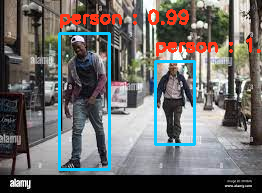

In [10]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/drive/MyDrive/AI_in_IOT/image5.jpeg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
for (classid, score, box) in zip(classes, scores, boxes):
        label = "%s : %.2f" % (class_names[classid],score)
        if class_names[classid] == "person" :
          cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
          cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
cv2_imshow(img)
